# Konfigrasyon ve Spark Bağlantısı

Spark'a Python'dan ulaşma ve çalışma için "findspark" adındaki kütüphaneyi indirmemiz gerekiyor.

In [1]:
!pip install findspark

In [2]:
import findspark
findspark.init("C:\spark")  ## Başlatmak için init fonksiyonuna sparkın adresini veriyoruz.

In [3]:
from pyspark import SparkContext   # bir spark bağlamı/ contexti oluşturuyoruz. Aynı File gibi.

In [4]:
## artık hadoopu vesparkı indirdin. Big data ile çalışmaya başlayabilirsin ;)

In [5]:
sc = SparkContext(master = "local") # Bu nesne oluşturma, ilkel bir yöntemdir. Aşşağılarda ileri seviye olanı göreceksin.
sc

<SparkContext master=local appName=pyspark-shell>

In [6]:
sc.version    # spark yüklü versiyon

'3.3.2'

In [7]:
sc.sparkUser()    # kullanıcı ad

'mrfrk'

In [8]:
sc.appName                # proje adı, nasıl belirleneceği aşşağıda var

'pyspark-shell'

In [9]:
dir(sc)

['PACKAGE_EXTENSIONS',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_assert_on_driver',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_encryption_enabled',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addArchive',
 'addFile',
 'addPyFile',
 'appName',
 'app

In [11]:
sc.stop()# açılan sessionu kapatmak için, yuakrıdaki linkte şuan giremeyeceksin. Mutlaka işin bitince sessionu kapat.

İleri seviye Spark instance'ı(nesnesi) oluşturmayı görelim.

In [12]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf # kongifrasyon ayarları için
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulaması") \
    .getOrCreate()
    # .config("spark.executer.memory","8gb") ne kadar ram kullanıalcağını belirtiyoruz, default bırakıran, senin pcine uykun ayarlıyor


sc = spark.sparkContext

In [13]:
sc

<SparkContext master=local appName=pyspark_uygulaması>

In [14]:
sc.stop()

# Temel DataFrame İşlemleri (Pandas DataFrame vs. Spark DataFrame) 

Pandas DF ile Spark DF farkları:
* Pandas DF paralel olarak çalışma özelliine sahip değildir. Spark DF ise sahiptir. Zaten Spark'taki amacımız birden fazla pc ile çalışmak olduğu için oradan aklında tutabilirsin. Spark DF farklı nodelarda, cluster içerisinde çalışabilir.
* Pandas DF'e göre Spark DF daha tembeldir.
* Spark DF immutable'dır. Yani değiştirilemez. Pandas tabiki böyle değil. İlla değiştirmek istersen Spark DF'i Pandas DF'e dönüştürdükten sonra üstünde oynayabilirsin.
* Pandas'ın veri manipülasyonu operasyonları daha zengin.

Biz yine Pandas kullanıp Spark DF'ler üzerinden veri manipülasyonu yapacağız.

Pandas'ta kullandığımız her fonksiyonu Spark'ta kullanamıyoruz. Detaylıca görelim:

In [16]:
spark = SparkSession.builder.master("local").appName("pyspark_uygulaması").getOrCreate()

sc = spark.sparkContext
sc

<SparkContext master=local appName=pyspark_uygulaması>

In [19]:
spark_df = spark.read.csv("diabetes.csv", header = True, inferSchema = True)

Yukarıdaki hücreyi çalıştırdıktan sonra Spark UI'a git, incele.

In [21]:
spark_df.printSchema()   # df.info() gibi 

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [22]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

Veriyi Cache'lemyelim. Yani Ram'e taşıyalım, daha hızlı erişebilmek ve işlem yapabilmek için.

In [23]:
spark_df.cache()

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [24]:
type(spark_df) #rame taşıyınca bir şey değişmediğini göstermek için tekrardan tipini bastırttım.

pyspark.sql.dataframe.DataFrame

In [25]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"]) # veri setindeki sürekli değişkenleri seçtik.

In [26]:
type(df)

pandas.core.frame.DataFrame

In [27]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [28]:
spark_df.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [30]:
df.dtypes

carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [31]:
spark_df.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

In [32]:
df.ndim

2

In [34]:
spark_df.ndim
spark_df.size

AttributeError: 'DataFrame' object has no attribute 'ndim'

# DataFrame İşlemleri-1

Veri setine SparkDF ile genel bir bakış atalım.

In [39]:
spark_df.show(2)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 2 rows



In [40]:
spark_df.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [42]:
spark_df.count() # gözlem sayısı

768

In [43]:
spark_df.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [44]:
len(spark_df.columns)

9

In [48]:
spark_df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [49]:
spark_df.describe("BMI").show() # tek bir değişken

+-------+------------------+
|summary|               BMI|
+-------+------------------+
|  count|               768|
|   mean|31.992578124999977|
| stddev| 7.884160320375441|
|    min|               0.0|
|    max|              67.1|
+-------+------------------+



In [50]:
spark_df.describe("BMI") 

DataFrame[summary: string, BMI: string]

Biz burada tüm Big Datayı ele almayacağız. Bir Makine Öğrenmesinde ile Big Data'nın nasıl kullanıldığı, basit veri manipülasyonları işlemlerinin nasıl yapıldığını ele alacağız. Detaylarını kendin araştırıp bakarsın.

In [52]:
# değişken seçme
spark_df.select("Glucose").show(5)

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
+-------+
only showing top 5 rows



In [53]:
spark_df.select("Glucose","BMI").show(5)

+-------+----+
|Glucose| BMI|
+-------+----+
|    148|33.6|
|     85|26.6|
|    183|23.3|
|     89|28.1|
|    137|43.1|
+-------+----+
only showing top 5 rows



In [54]:
spark_df.select("Glucose").distinct().count() #eşsiz değer sayısı, değer türü

136

In [59]:
# çoklayan gözlemleri silme
spark_df.select("Glucose").dropDuplicates().show()

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    137|
|     65|
|    133|
|     78|
|    155|
|    108|
|    193|
|    115|
|    126|
|    101|
|     81|
|    183|
|     76|
|    159|
|     44|
|    103|
|     91|
|    128|
+-------+
only showing top 20 rows



In [60]:
spark_df.select("Glucose").count() #

768

In [65]:
spark_df.select("Glucose").show(10)

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
|    116|
|     78|
|    115|
|    197|
|    125|
+-------+
only showing top 10 rows



In [66]:
## iki değişken arası crosstab
tablo = spark_df.crosstab("Outcome","Pregnancies")  # gördüğün gibi burada bırakırsan sadece tablo oluşur, tabloyu görmek için show fonksiyonunu ekle
tablo.show()

+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [67]:
## eksik gözlemlerin sayısı
spark_df.dropna().count()

768

In [69]:
# gözlem seçme için filter kullanılıyor.
spark_df.filter(spark_df.Age > 40).count()

194

In [70]:
spark_df.groupby("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [71]:
spark_df.groupby("Outcome").count() # lazy yapı işte bu, iilabişi eklemen gerekiyor

DataFrame[Outcome: int, count: bigint]

In [72]:
spark_df.groupby("Outcome").agg({"BMI":"mean"}).show()  #gruplara göre ortalama alacak

+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



In [81]:
# değişken ekleme-silme
spark_df.withColumn("New_Variable", spark_df.BMI/2) \
                .select("BMI","New_Variable").show()  #yukarısı fonksiyonu kaydetmek için yeterlidir. Aşşağıda ise hızlıca bastırmak için fonksiyonu kaydetmedik. Sonuçta eğitim bölümündeyiz.

+----+------------+
| BMI|New_Variable|
+----+------------+
|33.6|        16.8|
|26.6|        13.3|
|23.3|       11.65|
|28.1|       14.05|
|43.1|       21.55|
|25.6|        12.8|
|31.0|        15.5|
|35.3|       17.65|
|30.5|       15.25|
| 0.0|         0.0|
|37.6|        18.8|
|38.0|        19.0|
|27.1|       13.55|
|30.1|       15.05|
|25.8|        12.9|
|30.0|        15.0|
|45.8|        22.9|
|29.6|        14.8|
|43.3|       21.65|
|34.6|        17.3|
+----+------------+
only showing top 20 rows



In [77]:
spark_df.columns  # kaydetmediiik dikkat et!!

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [82]:
# var olan değişkenin ismini değiştirme
spark_df.withColumnRenamed("Outcome","bagimli_degisken").columns   # bak kaydetmiyorz, unutma

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'bagimli_degisken']

In [83]:
# değişken silme
spark_df.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [84]:
spark_df.drop("Insulin").columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

Spark_df'ten verileri Python'a çekip localde incelemek isteyebiliriz. Bunun için topandas() fonksiyonunu kullanmamız gerekiyor.

In [87]:
spark_df.groupby("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



Amacımız, yukarıdaki verilere erşmek olsun. Bunun için:

In [88]:
spark_df.groupby("Outcome").count().toPandas()

,Outcome,count
0,1,268
1,0,500


Tanıdık geldi mi :)

In [89]:
df = spark_df.groupby("Outcome").count().toPandas()
type(df)

pandas.core.frame.DataFrame

In [90]:
df.iloc[0:1,0:1]

,Outcome
0,1


In [91]:
df.iloc[1,1]

500

# SQL İşlemleri

In [93]:
spark_df.createOrReplaceTempView("table_df")

In [96]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [97]:
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         | table_df|       true|
+---------+---------+-----------+



In [98]:
spark.sql("select Glucose from table_df").show(5)

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
+-------+
only showing top 5 rows



In [99]:
spark.sql("select Outcome, mean(Glucose) from table_df group by Outcome").show()

+-------+------------------+
|Outcome|     mean(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



#  Big Data'da Veri Görselleştirme

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
spark_df.barpot(x="Outcome",y=spark_df.Outcome.index, data = spark_df)

AttributeError: 'DataFrame' object has no attribute 'barpot'

İzlenecek Yol:Veriyi sparkt tarafında önce itenilen işlemlere tabi tutmak. Daha sonra Pandasa dönüştürüp python kütüphaneleri ile görselleştirmek. 

In [106]:
sdf = spark_df.toPandas()
sdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Outcome'>

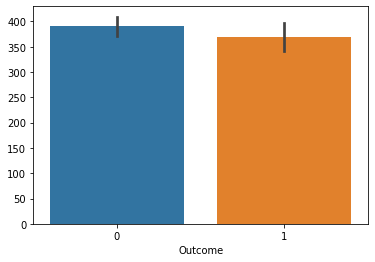

In [109]:
sns.barplot(x="Outcome",y=sdf.Outcome.index, data = sdf)

In [ ]:
Aggregation işlemlerini sparkın gücünden yararlanarak halledip, daha sonra pandasa dönüştürüp görselleştir.

In [110]:
spark.stop()